### Install Packages

In [ ]:
! pip install matplotlib scikit-image opencv-python

### Imports

We import multiple packages that we are going to be using in todays lab.

- **Matplot** for visualizating Images and Plotting Graphs 
- **Numpy** for storing data in multi-demnesional arrays
- **Scikit Image** for reading, writing and manipulating images
- **OpenCV** for reading, writing and manipulating images

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from skimage import io, data, exposure, morphology
from skimage.morphology import disk
from skimage.filters import rank
import cv2

### Util Functions

The cell below contains the functions that serve as utilities and are used throughout the notebook.

In [2]:
def show(img):
    io.imshow(img)
    plt.show()

### Setting Up Python Enviorment

1. Download and Install Conda from [Anaconda](https://www.anaconda.com/products/individual-d) Website
2. Open Terminal/CMD
3. Type **conda create -n [ENV NAME] python=[Python Version (3.5,3.6,3.7)]** to create conda env
4. Next activate enviorment using the command **conda activate [ENV NAME]**
5. Install all the relevant packages using **Conda** or **Pip** package manager

## Reading Image 

There are various libraries used for reading images. However we will only be using OpenCV and Scikit Image for now to read images.

In [3]:
help(io.imread)

Help on function imread in module skimage.io._io:

imread(fname, as_gray=False, plugin=None, **plugin_args)
    Load an image from file.
    
    Parameters
    ----------
    fname : string
        Image file name, e.g. ``test.jpg`` or URL.
    as_gray : bool, optional
        If True, convert color images to gray-scale (64-bit floats).
        Images that are already in gray-scale format are not converted.
    plugin : str, optional
        Name of plugin to use.  By default, the different plugins are
        tried (starting with imageio) until a suitable
        candidate is found.  If not given and fname is a tiff file, the
        tifffile plugin will be used.
    
    Other Parameters
    ----------------
    plugin_args : keywords
        Passed to the given plugin.
    
    Returns
    -------
    img_array : ndarray
        The different color bands/channels are stored in the
        third dimension, such that a gray-image is MxN, an
        RGB-image MxNx3 and an RGBA-image M

In [4]:
help(cv2.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
    .   -   Portable Network Graphics - \*.png (see the *Note* section)
    .   -   WebP - \*.webp (see the *Note* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   PFM files - \*.pfm (see the *Note* section)
    .   -   

(460, 768, 3)


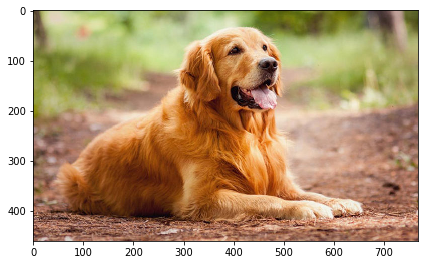

(460, 768, 3)


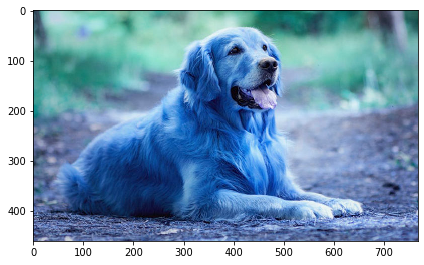

(460, 768, 3)


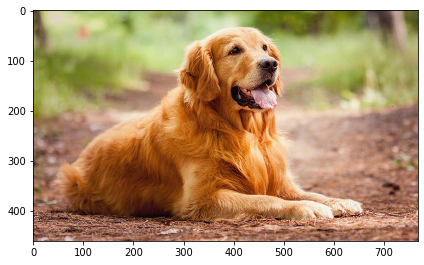

In [5]:
image_path = "../inputs/dog.jpg"

scikit_image = io.imread(image_path)
cv2_image = cv2.imread(image_path,-1)


print(scikit_image.shape)
show(scikit_image)
print(cv2_image.shape)
show(cv2_image)

cv2_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)
print(cv2_image.shape)
show(cv2_image)

## Reading Video

Apart from reading images we can also read videos using OpenCV library.

In [ ]:
help(cv2.VideoCapture)

/home/nauyan/anaconda3/envs/computer_vision/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


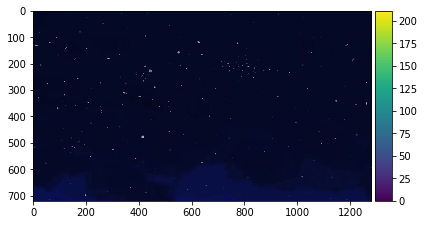

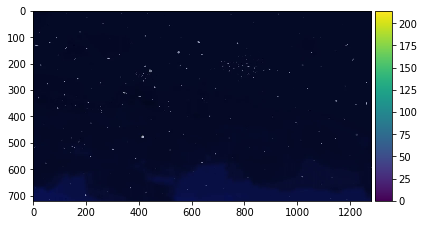

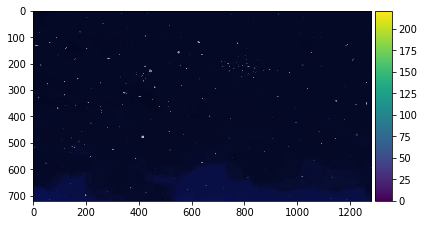

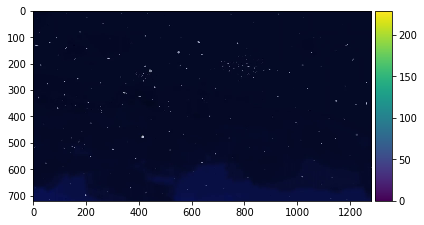

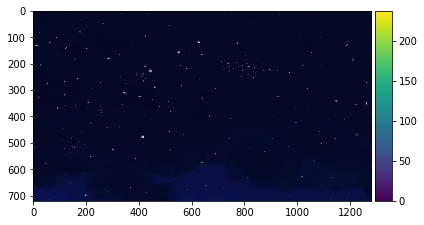

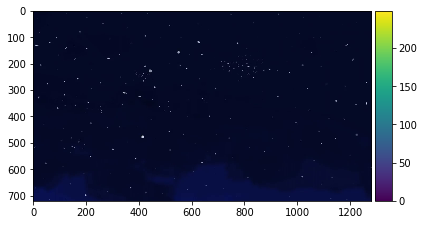

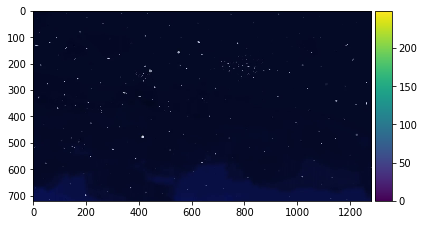

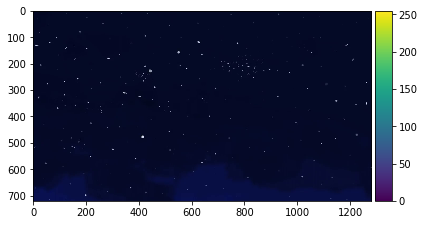

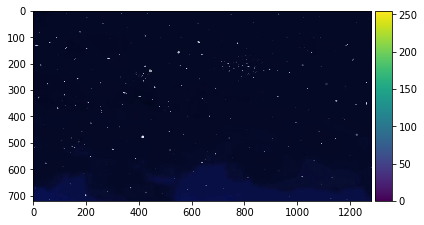

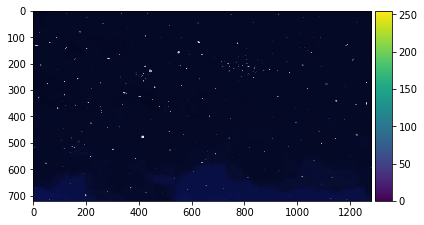

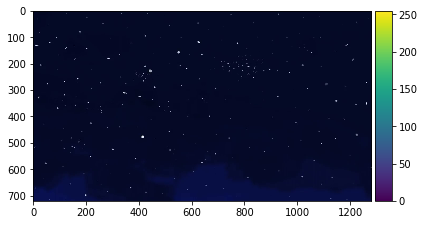

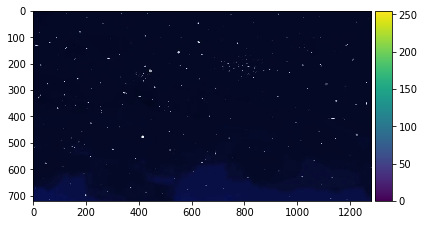

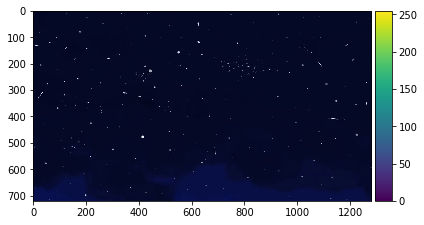

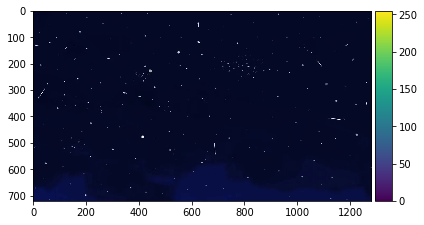

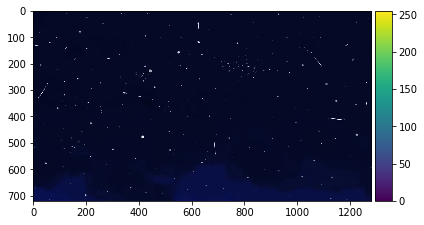

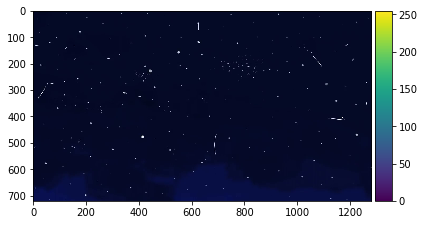

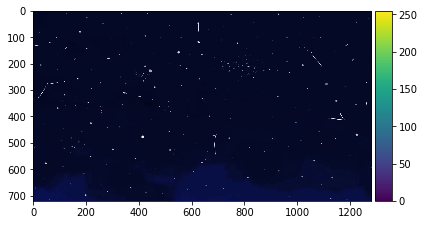

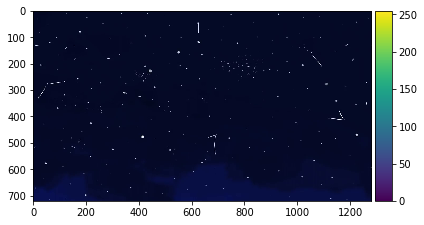

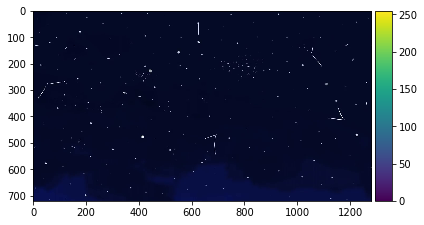

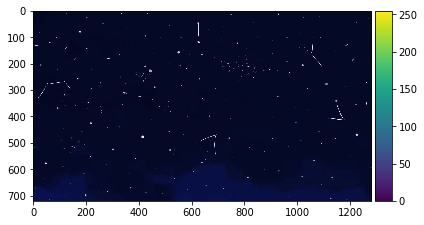

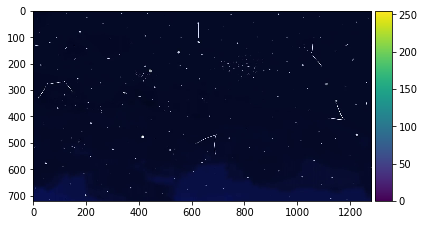

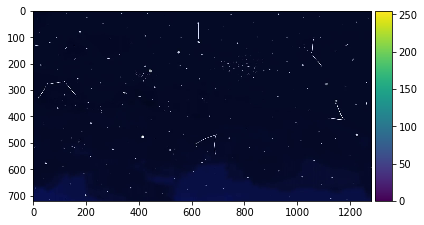

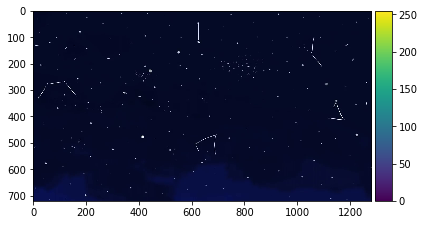

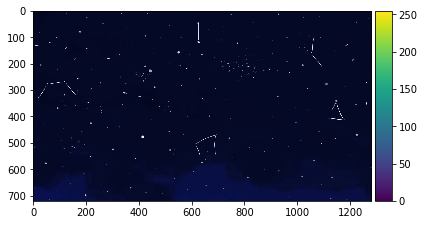

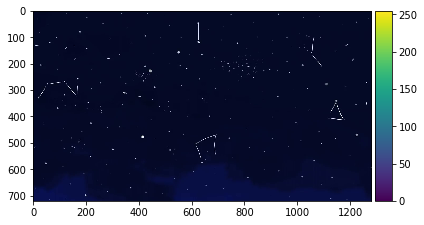

KeyboardInterrupt: 

In [6]:
cap = cv2.VideoCapture('../inputs/sample.mp4')
# cap = cv2.VideoCapture(0) # Set 0 to use WebCam


if (cap.isOpened()== False): 
      print("Error opening video stream or file")


while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        show(frame)
    else: 
        break

cap.release()
cv2.destroyAllWindows()

## Display Cropped Images

To crop images we can simply use numpy slicing and dicing.

You can read more about Array Slicing and Dicing in this [Numpy Cheat Sheet](https://atmamani.github.io/cheatsheets/numpy/numpy_cheat_sheet_2/)

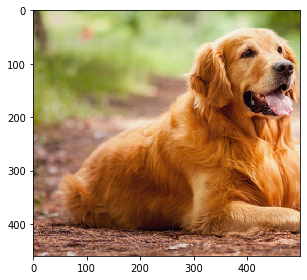

In [9]:
# show(scikit_image)
show(scikit_image[:500,:500])

## Conversion of Gray Scale to Binrary

Image Binarization is assigning pixel values of an images to either 0 and 1.

Gray Scale Image


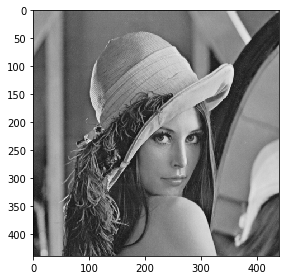

Binarized Image


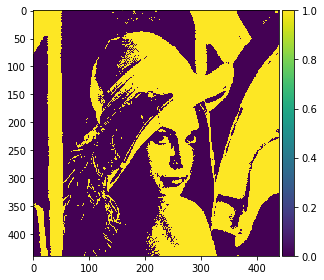

In [13]:
image_path = "../inputs/lena.png"

scikit_image = io.imread(image_path,True)
print("Gray Scale Image")
# print(scikit_image.shape)
show(scikit_image)
binary_image = (scikit_image > .5).astype(int)
print("Binarized Image")
show(binary_image)

## Viewing Image Channels

We know that a Color Image comprises of three Channels namely: Red, Green and Blue also know as RGB Images. 

- Array format of Colored Images in OpenCV is BGR
- Array format of Colored Images in OpenCV is RGB

For simplicity and for viewing each R,G,B channels of Image we use Scikit Image Library for now. 

Red Channel Image


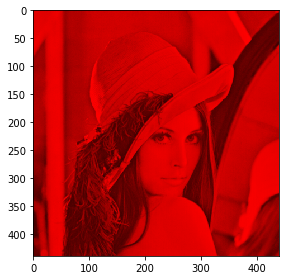

Green Channel Image


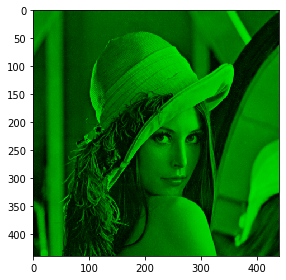

Blue Channel Image


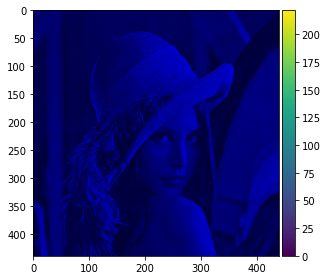

In [14]:
image_path = "../inputs/lena.png"

scikit_image = io.imread(image_path)

print("Red Channel Image")
red_image = scikit_image.copy()
red_image[:,:,1] = 0 #empty green channel
red_image[:,:,2] = 0 #empty blue channel
show(red_image)

print("Green Channel Image")
green_image = scikit_image.copy()
green_image[:,:,0] = 0 #empty red channel
green_image[:,:,2] = 0 #empty blue channel
show(green_image)

print("Blue Channel Image")
blue_image = scikit_image.copy()
blue_image[:,:,0] = 0 #empty red channel
blue_image[:,:,1] = 0 #empty green channel
show(blue_image)

## Image Histogram

*An image histogram is a gray-scale value distribution showing the frequency of occurrence of each gray-level value.*

Standard Image


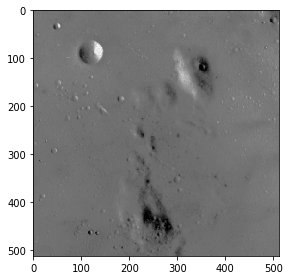

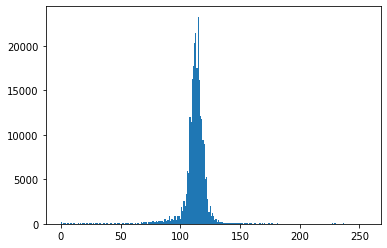

Global Equalized Image


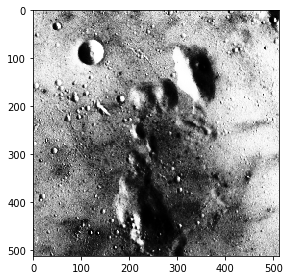

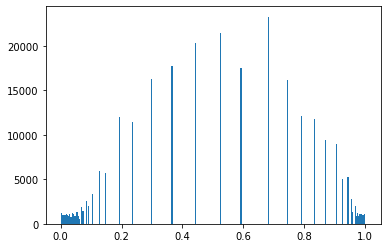

Rank Equalized Image


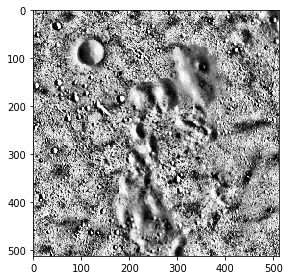

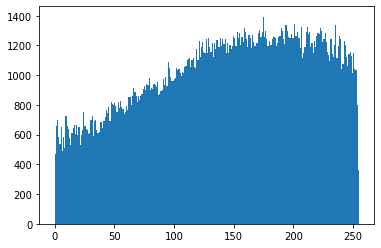

Adaptive Histogram Equalizated Image


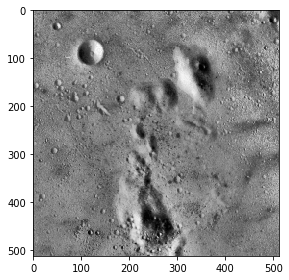

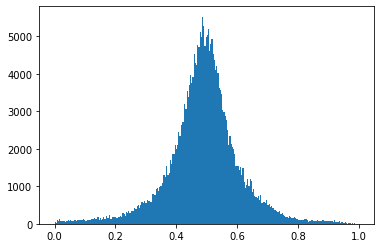

In [15]:
def plot_hist(image):
    ax = plt.hist(image.ravel(), bins = 256)
    plt.show()


image = data.moon()

# Standard Image
print("Standard Image")
show(image)
plot_hist(image)

# Global equalize
print("Global Equalized Image")
img_rescale = exposure.equalize_hist(image)
show(img_rescale)
plot_hist(img_rescale)

# Equalization
print("Rank Equalized Image")
selem = disk(30)
img_eq = rank.equalize(image, selem=selem)
show(img_eq)
plot_hist(img_eq)

# Adaptive Histogram Equalization
print("Adaptive Histogram Equalizated Image")
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)
show(img_adapteq)
plot_hist(img_adapteq)